In [18]:
from qcodes_contrib_drivers.drivers.Thorlabs.APT import Thorlabs_APT
import numpy as np
import matplotlib.pyplot as plt
from seabreeze.spectrometers import list_devices, Spectrometer
import time
import csv
import os

In [20]:
devices = list_devices()
if devices:
    print("Available devices:", devices)
else:
    print("No devices available.")

Available devices: [<SeaBreezeDevice HR4000:HR4C222>]


In [21]:
spec = Spectrometer(devices[0])

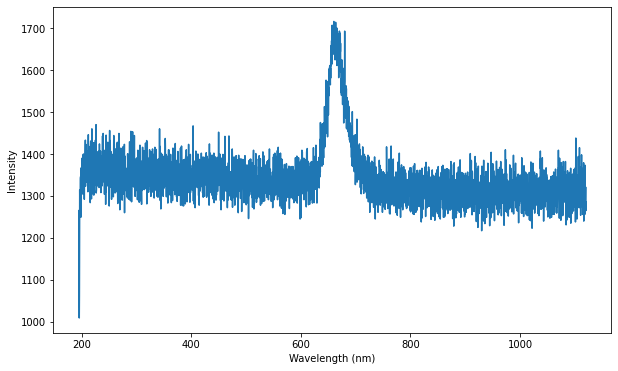

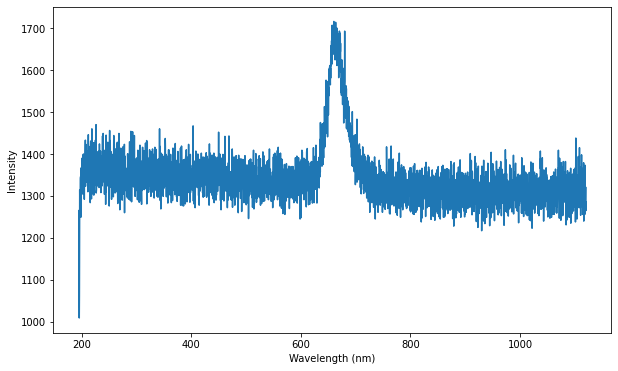

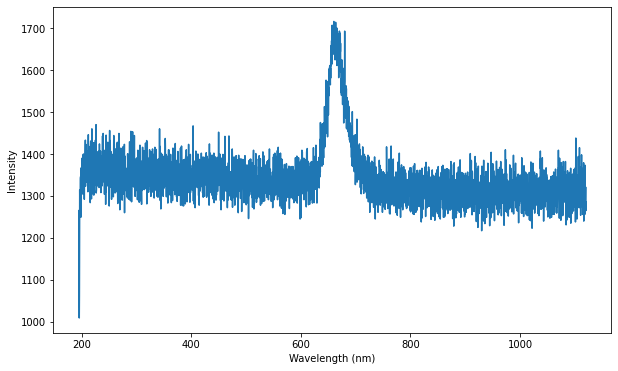

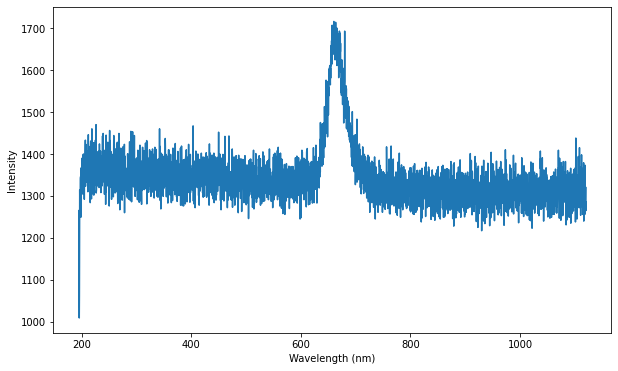

In [28]:
def perform_accumulation(spec, num_accumulations, exposure_time_micros):
        if spec is None:
            print("Spectrometer not connected. Please connect first.")
            return
        
        time.sleep(2.0)
        # Set integration time
        spec.integration_time_micros(exposure_time_micros)

        # Initialize lists to store wavelengths and intensities
        wavelengths = []
        intensities = [[] for _ in range(num_accumulations)]
    
        # Perform accumulation
        for i in range(num_accumulations):
            time.sleep(0.5)
            current_wavelengths = spec.wavelengths()
            current_intensities = spec.intensities()

            wavelengths.extend(current_wavelengths)
            intensities[i] = current_intensities

            fig = plt.figure(figsize=(10, 6))
            ax = fig.add_subplot(111)
            ax.plot(wavelengths[:len(current_wavelengths)], intensities[0])

            # Label the x and y axes
            ax.set_xlabel('Wavelength (nm)')
            ax.set_ylabel('Intensity')

            # Add angle and exposure time information inside the plot
            # info_text = f"Angle: {MeasurementController.current_angle}°\nExp Time: {exposure_time_micros} µs"
            # ax.text(0.98, 0.98, info_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))

            # plt.savefig(output_plot_filepath, bbox_inches='tight', pad_inches=0.5)
            # time.sleep(1.0)
            plt.show()
perform_accumulation(spec, 4, 200000)

In [17]:
spec.close()

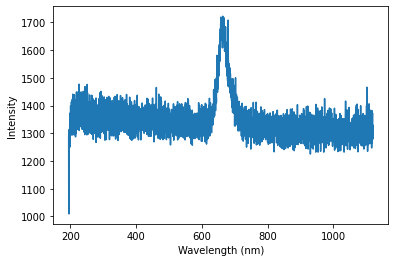

In [29]:
spec.integration_time_micros(200000)
# wavelengths, intensities = spec.spectrum()

# print(wavelengths)
# print(intensities)
# spec = Spectrometer.from_first_available()

wavelengths, intensities = spec.spectrum()


# Plot the data
plt.plot(wavelengths, intensities)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()


In [30]:
wavelengths, intensities = spec.spectrum()

print(wavelengths)
print(intensities)

[ 194.9648667   195.23630391  195.50773147 ... 1120.06999776 1120.30609537
 1120.54218324]
[1292.  986. 1070. ... 1287. 1281. 1286.]
